# DBSCAN

## import dataset

In [21]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## define X

In [23]:
import numpy as np
X = df.iloc[: , 3:]
X[:3]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


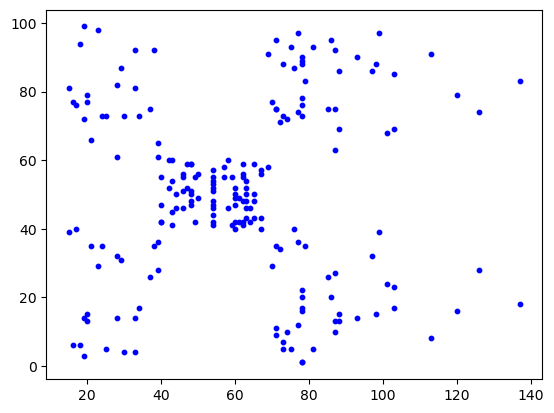

In [25]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='b', s=10)

# train 

In [27]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN()
dbs.fit(X)

DBSCAN()

In [17]:
labels = dbs.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

# visual

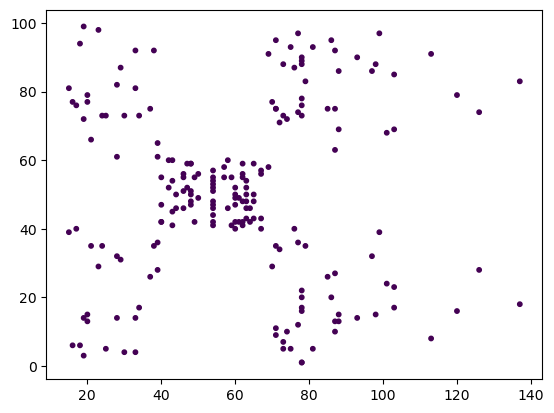

In [29]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=labels, s=10)
plt.show()

# find parameter

In [31]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nn.fit(X)

NearestNeighbors(n_neighbors=4)

In [33]:
distances = nn.kneighbors(X)[0]
distances[:5]

array([[0.        , 2.23606798, 7.21110255, 9.8488578 ],
       [0.        , 4.12310563, 5.38516481, 5.38516481],
       [0.        , 2.        , 4.24264069, 8.06225775],
       [0.        , 1.41421356, 4.        , 4.12310563],
       [0.        , 2.23606798, 6.40312424, 8.60232527]])

In [35]:
distances = np.sort(distances, axis=0)
distances = distances[: , 3]
distances[:5]

array([1.41421356, 1.41421356, 1.41421356, 2.        , 2.        ])

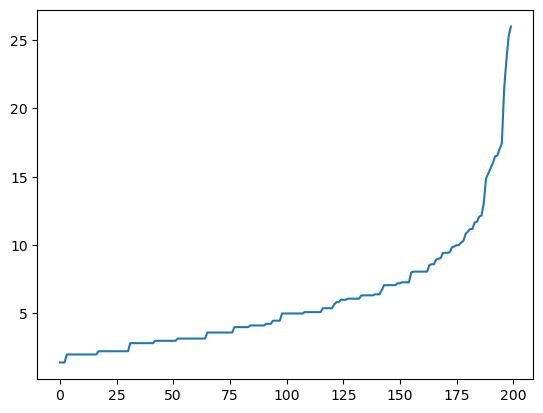

In [37]:
plt.plot(distances)

In [39]:
dbs = DBSCAN(eps=10 , min_samples=4)
dbs.fit(X)

DBSCAN(eps=10, min_samples=4)

In [41]:
labels = dbs.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  2,  1,  2,  1,  0,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  0,  1,  2,  1,  0,  1,  2,  1,  2,  1,  2,
        1,  2,  1,  2,  1,  2,  1,  0,  1,  2,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1, -1,  1,  2,
       -1,  2,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

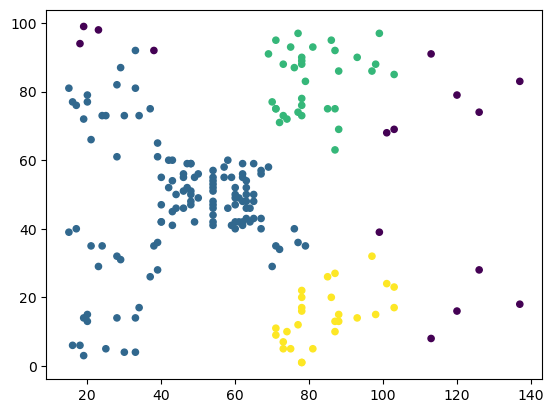

In [45]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=labels, s=20)
plt.show()